# Prueba técnica - Formador IA (Fundación Somos F5)
## Explorador de Sesgos en Modelos de IA  
### Aplicación educativa, para la predicción de diabetes  

---

## Propósito del proyecto

Este proyecto tiene como objetivo, construir una **actividad didáctica integral**, accesible y orientada a un grupo diverso de estudiantes, que permita:

1. **Comprender paso a paso** cómo se desarrolla un proyecto real de *Machine Learning*.  
2. **Cargar y explorar un dataset público en formato CSV**, identificando patrones, valores atípicos y necesidades de limpieza.  
3. **Entrenar y comparar dos modelos clásicos de IA** (Regresión Logística y Random Forest).  
4. **Interpretar métricas esenciales de clasificación** (Accuracy, Recall, F1-macro, matriz de confusión, curvas ROC).  
5. **Detectar posibles sesgos del modelo**, analizando el rendimiento por grupos de edad.  
6. **Aplicar explicabilidad mediante IA generativa**, usando un mock que transforma métricas en lenguaje accesible.  
7. **Profundizar en la comparación de hiperparámetros**, explorando cómo afectan al rendimiento del Random Forest.  
8. **Interactuar con una mini interfaz Streamlit**, que permite visualizar resultados sin necesidad de programar.  
9. **Promover una mirada ética, inclusiva y transformadora** sobre el uso de IA en contextos sociales sensibles, en coherencia con la misión de Fundación Somos F5.

---

## Dataset utilizado

El proyecto utiliza el **Pima Indians Diabetes Dataset**, un dataset público muy extendido en docencia, por su simplicidad y relevancia. Permite:

- Trabajar problemas de **clasificación binaria**.  
- Abordar **preprocesamiento realista**: valores faltantes no explícitos, escalado, imputación.  
- Reflexionar sobre **riesgo en salud**, predicción, errores y consecuencias reales.  
- Explorar **posibles sesgos por edad**, críticos en aplicaciones clínicas.

Es un dataset manejable, ideal para actividades formativas de corta o media duración.

---

## Enfoque pedagógico

La actividad está diseñada según un enfoque inclusivo, práctico y accesible, de acuerdo con los valores de Somos F5.  
Permite que cualquier estudiante, independientemente de su experiencia previa, pueda:

- Manipular datos reales de manera segura.  
- Comprender la importancia del tratamiento de datos antes del modelado.  
- Entrenar sus primeros modelos de IA.  
- Interpretar métricas, sin tecnicismos innecesarios.  
- Debatir sobre sesgos, equidad y consecuencias sociales de los modelos.  
- Ver cómo una **interfaz interactiva** (Streamlit) facilita el acceso a los resultados.  
- Descubrir el rol pedagógico de la **IA generativa** como herramienta de explicación.

El propósito central es **romper barreras digitales**, fomentar autonomía y desarrollar pensamiento crítico.

---

## Estructura del notebook

El proyecto sigue una secuencia estructurada en bloques, que acompaña al alumnado en el proceso completo de creación y evaluación de un modelo:

1. **Carga del dataset (CSV público) y descripción inicial**  
2. **Exploración inicial del dataset**  
3. **Análisis exploratorio de datos (EDA)**  
4. **Preprocesamiento y preparación del dataset**  
5. **Entrenamiento y comparación de modelos de ML**  
6. **Detección de sesgos y reflexión ética**  
7. **Explicabilidad con IA generativa (mock LLM)**  
8. **Comparación de hiperparámetros del Random Forest (profundización opcional)**  
9. **Mini interfaz en Streamlit para visualizar métricas y generar explicaciones**  
10. **Códigos QR, para facilitar la accesibilidad**

---

A continuación comienza la construcción técnica del proyecto.


# Bloque 1. Carga del dataset (CSV público) y descripción inicial

En esta sección cargamos un **dataset real y público en formato CSV**, cumpliendo con los requisitos técnicos de la prueba.  
El dataset utilizado es el **Pima Indians Diabetes Dataset**, un recurso ampliamente empleado en formación porque:

- Es accesible desde una URL pública.  
- Contiene únicamente variables numéricas fáciles de trabajar.  
- Permite enseñar preprocesamiento realista (valores faltantes no explícitos).  
- Dispone de una variable objetivo binaria (`Outcome`) muy clara de interpretar.  
- Es adecuado para introducir conceptos de salud, prevención y sesgos por grupos de edad.

### Fuente del dataset  
- Origen: repositorio público de Plotly (datasets educativos).
- Pima Indians Diabetes Dataset desde URL pública.  
- Formato: CSV.  
- URL directa: https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv  
- Licencia: uso abierto para fines educativos.

### Descripción del dataset
Cada fila representa a una persona; cada columna, una medida clínica:

| Columna | Descripción |
|--------|-------------|
| Pregnancies | Nº de embarazos |
| Glucose | Nivel de glucosa en sangre |
| BloodPressure | Presión sanguínea |
| SkinThickness | Grosor de pliegue cutáneo |
| Insulin | Nivel de insulina |
| BMI | Índice de masa corporal |
| DiabetesPedigreeFunction | Probabilidad hereditaria |
| Age | Edad |
| Outcome | Variable objetivo (1 = diabetes, 0 = no diabetes) |

A continuación cargamos el CSV, mostramos algunas filas y extraemos la información general del dataset.


In [ ]:
# 1. Importación de las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 2. Cargar el CSV desde una URL pública
#    - Cumple el requisito de "dataset real/público en CSV"
#    - No requiere descargas ni autenticaciones

url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"

df = pd.read_csv(url)

# Mostrar primeras filas, para inspección inicial
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Bloque 2. Exploración inicial del dataset

Antes de comenzar a limpiar o modelar, es importante responder:

- ¿Cuántas filas y columnas tiene?
- ¿Qué tipos de datos encontramos?
- ¿Cómo se distribuye la variable objetivo?
- ¿Qué posibles problemas podemos anticipar?

Este paso permite que el alumnado, adquiera una **mirada crítica y exploratoria**, clave en ciencia de datos.


In [ ]:
# Dimensiones del dataset: número de filas y columnas
print("Dimensiones del dataset:", df.shape)

Dimensiones del dataset: (768, 9)


### Dimensiones del Dataset

El dataset cargado contiene:

- **768 filas** (observaciones o registros)
- **9 columnas** (atributos o variables)

Esto se obtuvo utilizando el atributo `.shape` del DataFrame de Pandas:

```python
print("Dimensiones del dataset:", df.shape)


In [ ]:
# Información general: tipos de datos y valores nulos
print("\nInformación del dataset:")
df.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


###  Información General del Dataset

He utilizado el método `df.info()` para obtener una visión general del dataset:

```python
df.info()


### Información General del Dataset

Este dataset, contiene información médica de pacientes.

#### Estructura del Dataset

-  **Filas (registros):** 768
-  **Columnas (variables):** 9
-  **Memoria usada:** 54.1 KB
-  **Valores nulos:** No hay valores nulos

#### Tipos de Datos

- **7 columnas** con datos enteros (`int64`)
- **2 columnas** con datos decimales (`float64`)

#### Columnas del Dataset

| Variable                  | Descripción breve                          |
|---------------------------|--------------------------------------------|
| `Pregnancies`             | Número de embarazos                        |
| `Glucose`                 | Nivel de glucosa en sangre                 |
| `BloodPressure`           | Presión arterial                           |
| `SkinThickness`           | Grosor del pliegue cutáneo                 |
| `Insulin`                 | Nivel de insulina en sangre                |
| `BMI`                     | Índice de masa corporal                    |
| `DiabetesPedigreeFunction`| Probabilidad de diabetes por herencia      |
| `Age`                     | Edad del paciente                          |
| `Outcome`                 | Diagnóstico: 1 = diabetes, 0 = no diabetes |


In [ ]:
# Resumen estadístico, de todas las variables numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Resumen Estadístico de las Variables Numéricas

He utilizado el método `df.describe().T` para obtener estadísticas básicas, de cada variable numérica del dataset.

#### Principales estadísticas mostradas:

- **count**: número de datos no nulos
- **mean**: media aritmética
- **std**: desviación estándar (variabilidad)
- **min / max**: valor mínimo y máximo
- **25% / 50% / 75%**: percentiles (cuartiles)

####  Observaciones importantes:

- Varias columnas tienen **valores mínimos en 0**, lo cual **no es realista médicamente**:
  - `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`
  -  Esto indica que hay datos posiblemente faltantes codificados como 0

- **Desviación estándar alta** en `Insulin`, lo que muestra gran dispersión:
  - Media: ~80, pero valor máximo: **846**

- La variable `Outcome` es binaria (0 = No diabetes, 1 = Diabetes), con:
  - **34.9%** de los casos positivos

#### Ejemplo de algunas estadísticas:

| Variable      | Media | Mínimo | Máximo | Nota rápida |
|---------------|-------|--------|--------|-------------|
| Glucose       | 120.89| 0.0    | 199.0  | 0 no es real |
| BloodPressure | 69.10 | 0.0    | 122.0  | Posibles errores |
| BMI           | 31.99 | 0.0    | 67.1   | 0 no tiene sentido |
| Age           | 33.24 | 21.0   | 81.0   | Rango razonable |
| Outcome       | 0.35  | 0.0    | 1.0    | Binaria |


# Bloque 3. Análisis exploratorio de los datos (EDA)

Antes de preparar los datos y entrenar modelos, realizo un análisis exploratorio sencillo.
Este paso, permite al alumnado comprender:

- Como se distribuyen las variables más relevantes.
- Si hay valores atípicos o distribuciones extrañas.
- Como está balanceada la variable objetivo (`Outcome`).
- Que patrones podrían indicar posibles sesgos.

El objetivo, es fomentar una mirada crítica hacia los datos, antes de aplicar cualquier modelo.
A continuación se muestran visualizaciones básicas, para facilitar esta comprensión.


/tmp/ipython-input-1349961830.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


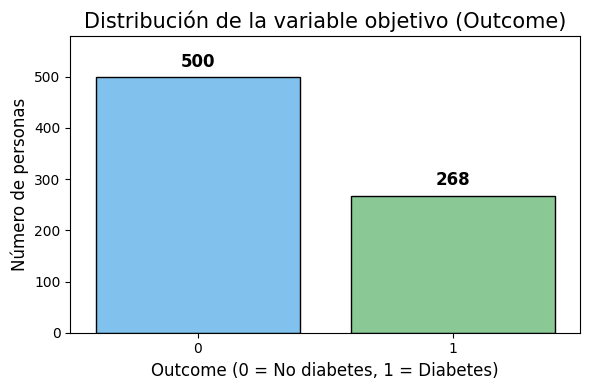

,Proporción (%)
Outcome,
0,0.651042
1,0.348958


In [ ]:
# Distribución de la variable objetivo (Outcome)

# Creo una grafica de barras.
plt.figure(figsize=(6,4))

# Defini colores.
# Azul suave (#6EC6FF) y verde suave (#80D28F)
custom_colors = ['#6EC6FF', '#80D28F']

# Dibujo la gráfica de conteo (countplot)
sns.countplot(
    x='Outcome',        # columna objetivo
    data=df,            # dataset
    palette=custom_colors,   # colores definidos
    edgecolor='black'        # bordes
)

# Título de la gráfica.
plt.title("Distribución de la variable objetivo (Outcome)", fontsize=15)

# Etiquetas de los ejes X e Y
plt.xlabel("Outcome (0 = No diabetes, 1 = Diabetes)", fontsize=12)
plt.ylabel("Número de personas", fontsize=12)

# Calculo los valores de cada clase (0 y 1)
counts = df['Outcome'].value_counts().sort_index()

# Ajusto el límite superior del eje Y
plt.ylim(0, max(counts) + 80)   # añadimos margen adicional

# Añado los valores encima de cada barra de forma clara y estética.
for i, val in enumerate(counts):
    plt.text(
        i,                # posición X sobre la barra
        val + 20,         # posición Y (20 unidades por encima de la barra)
        str(val),         # mostramos el número de casos
        ha='center',      # alineación horizontal
        fontsize=12,
        fontweight='bold' # resaltamos el número para mayor claridad
    )

# Ajusto el diseño, para evitar recortes
plt.tight_layout()

# Muestro la gráfica
plt.show()


# También muestro, las proporciones (%) de cada clase.
# Esto es útil, para detectar desbalanceo del dataset.

df['Outcome'].value_counts(normalize=True).rename("Proporción (%)")


## Interpretación pedagógica, de la distribución del objetivo (Outcome)

La gráfica anterior, muestra cuantas personas del *dataset* presentan diabetes (`Outcome = 1`) y cuántas no (`Outcome = 0`).  
Esta es una de las visualizaciones más importantes, al comenzar un proyecto de Machine Learning, porque nos permite:

###  1. Comprender el equilibrio de clases
Observamos que:
- Hay **500 personas sin diabetes**.
- Hay **268 personas con diabetes**.

Esto significa que existe un **desbalanceo moderado**: la clase “no diabetes” es más frecuente.  
Aunque la diferencia no es extrema, sí es suficiente para influir en el modelo, sino tenemos cuidado.

###  2. Reflexionar sobre el impacto del desbalanceo
Si un modelo aprende directamente con esta distribución:
- Podría “inclinarse” a predecir con más facilidad que una persona **no** tiene diabetes.
- Esto sería especialmente problemático en un contexto de salud, donde los falsos negativos pueden tener consecuencias graves.

Por eso, más adelante aplicaré:
- **stratify=y** al dividir en train/test (para mantener proporciones).  
- Métricas como **Recall** y **F1**, que no dependen solo del número total de aciertos.

###  3. Facilitar comprensión al alumnado, con una visualización clara
La gráfica incluye:
- Colores suaves y accesibles  
- Valores numéricos sobre las barras  
- Ejes rotulados con un lenguaje claro  

Esto permite que cualquier estudiante, incluso sin experiencia previa, pueda interpretar el gráfico rápidamente.

###  4. Crear una base, para el análisis ético
Conocer la distribución de las clases, es el primer paso para:
- Detectar posibles **sesgos del modelo**.
- Entender como se reparte el error, entre los distintos grupos.
- Construir pensamiento crítico, sobre datos y tecnología.

En resumen, esta visualización no solo muestra cifras, sino que abre la puerta a hablar sobre **equidad**, **precisión** y **responsabilidad** en modelos aplicados a la salud.


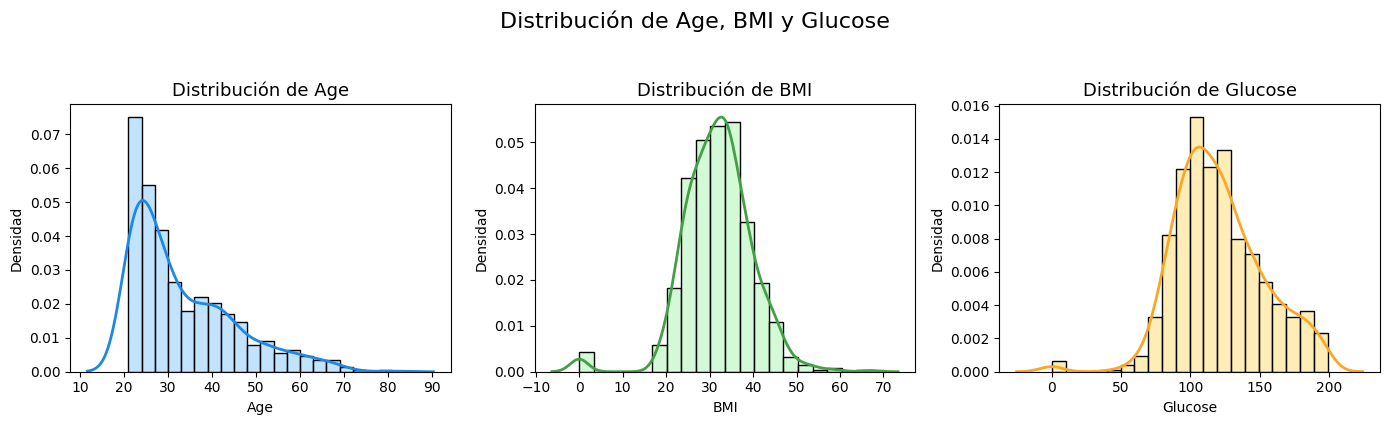

In [ ]:
# Histogramas estéticos de Age, BMI y Glucose

# Lista de variables que queremos mostrar
variables = ['Age', 'BMI', 'Glucose']

# Colores suaves para las barras
bar_colors = ['#A7D8FF', '#C3F7C7', '#FFE699']  # azul claro, verde claro, amarillo claro

# Colores diferentes para la curva KDE
kde_colors = ['#1E88E5', '#43A047', '#F9A825']  # azul fuerte, verde fuerte, amarillo fuerte

plt.figure(figsize=(14, 4))

for i, col in enumerate(variables):

    # Subgráfico correspondiente
    plt.subplot(1, 3, i + 1)

    # Dibujo el histograma SIN KDE, para poder personalizar los colores
    sns.histplot(
        data=df,
        x=col,
        bins=20,
        color=bar_colors[i],   # color de las barras
        edgecolor='black',
        stat='density',        # normaliza, para que coincida con la curva KDE
        alpha=0.7              # transparencia suave
    )

    # Dibujo la KDE, encima con un color distinto
    sns.kdeplot(
        data=df,
        x=col,
        color=kde_colors[i],   # color distinto al de las barras
        linewidth=2
    )

    # Títulos y ejes
    plt.title(f"Distribución de {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Densidad")

# Ajusto el diseño general
plt.suptitle("Distribución de Age, BMI y Glucose", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

## Distribución de variables clave: Age, BMI y Glucose

Antes de entrenar modelos, es importante que el alumnado vea **cómo se distribuyen**
algunas variables especialmente relevantes:

- `Age` (edad de la persona)
- `BMI` (índice de masa corporal)
- `Glucose` (nivel de glucosa en sangre)

Estos histogramas nos permiten:

- Detectar si hay valores extremos o poco realistas.
- Intuir los rangos que son más frecuentes.
- Conectar los datos con el contexto de salud (por ejemplo, sobrepeso o niveles altos de glucosa).

Anteriormente, se mostraron tres gráficos en la misma figura, para facilitar la comparación visual.

## Preguntas críticas para analizar los datos (Thinking Like a Data Educator)

Antes de continuar con el preprocesamiento, es importante que el alumnado aprenda a
**hacerse preguntas críticas sobre los datos**, no solo a ejecutar código.

Estas son algunas preguntas clave, que podrían lanzar en el aula, para promover
pensamiento analítico y responsable:

1. **¿Qué representa cada columna realmente?**  
   ¿Son datos clínicos medidos directamente? ¿Son autorreportados? ¿Proceden de dispositivos?

2. **¿Qué valores son físicamente imposibles?**  
   Un nivel de glucosa igual a 0 o una presión sanguínea de 0, son imposibles en la vida real.  
   ¿Qué nos dice esto sobre la calidad del dataset?

3. **¿Qué grupos podrían estar subrepresentados?**  
   ¿Hay más personas jóvenes que mayores? ¿Cómo afecta esto al modelo?

4. **¿Existen valores extremos, que podrían distorsionar el aprendizaje?**  
   ¿Qué pasa si entrenamos un modelo que “aprende” de outliers no realistas?

5. **¿Cómo afectan estos datos, al bienestar de las personas?**  
   En salud, un error de predicción puede impactar en diagnósticos o tratamientos.

6. **¿Qué preguntas, NO pueden responder estos datos?**  
   Por ejemplo, no podemos inferir género, estilo de vida o acceso al sistema sanitario.

Plantear estas preguntas en el aula, fomenta una actitud crítica y responsable hacia el uso de IA.



In [ ]:
# Comprobación de valores faltantes (NaN) en todo el dataset
# Cuento cuantos valores faltantes, hay por columna
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


##  Análisis de valores nulos en el dataset

El resultado del análisis de valores nulos, muestra que **ninguna columna contiene valores `NaN`**:

- Todas las variables aparecen con un recuento de `0` valores faltantes.
- Esto puede dar la impresión de que el dataset está “limpio”, pero en realidad debemos tener cuidado con esta conclusión.

###  ¿Por qué este resultado NO significa que los datos estén completos?

En muchos datasets reales —especialmente en el ámbito de la salud—  
los valores faltantes **no se representan como `NaN`**, sino como números dudosos o imposibles.

Por ejemplo:

- *0 en glucosa*  
- *0 en presión sanguínea*  
- *0 en insulina*  
- *0 en BMI*

Son valores **clínicamente imposibles**, lo que indica que la medición **no se realizó**, aunque técnicamente no aparezca como nula.

###  Reflexión pedagógica

Este resultado es muy útil para el alumnado, porque muestra que:

1. **La ausencia de `NaN` no implica ausencia de problemas.**  
   Debemos mirar los datos con pensamiento crítico, no solo técnico.

2. **Los datos pueden “esconder” valores faltantes, mediante códigos numéricos.**  
   Un dataset sin nulos, puede tener errores graves si no analizamos las distribuciones.

3. **En IA aplicada a salud, interpretar valores imposibles es esencial para no dañar a las personas.**

###  Próximo paso

Por este motivo, en el análisis siguiente revisaremos cuantos **ceros sospechosos** aparecen en las variables clínicas.  
Esto permitirá, decidir como imputar esos valores de forma responsable durante el preprocesamiento.

## Resumen de hallazgos del EDA y acciones a tomar

El análisis exploratorio, nos permite identificar varios aspectos importantes que
debemos abordar antes de entrenar modelos. Este tipo de síntesis ayuda al alumnado
a entender que los modelos no empiezan con algoritmos, sino con **una buena lectura de los datos**.

| Problema detectado | Evidencia en el EDA | Acción que tomaremos en el preprocesado |
|--------------------|--------------------|------------------------------------------|
| **Valores imposibles (0) en variables clínicas** | Conteo de ceros y boxplots | Reemplazar 0 → NaN e imputar con la mediana |
| **Variabilidad muy alta en `Insulin`** | Boxplot con muchos outliers | Escalado y uso de modelos robustos (Random Forest) |
| **Distribución amplia en `Glucose` y `BMI`** | Histogramas y boxplots | Mantener pero estudiar impacto en métricas |
| **Desbalance moderado en `Outcome`** | Countplot (500 vs 268 casos) | Usar `stratify=y` en train/test |
| **Ausencia de `NaN` explícitos** | `df.isnull().sum()` = 0 | Revisar “nulos encubiertos” (ceros sospechosos) |
| **Sesgos potenciales por edad** | Distribución de Age | Analizar métricas por grupo de edad en fases posteriores |

Este resumen, convierte el EDA en una narración clara y comprensible para las personas que aprenden,
mostrando que las decisiones técnicas tienen un propósito pedagógico y ético.


## Reflexión ética antes de entrenar modelos de IA

El análisis exploratorio no solo nos da información técnica, sino que también plantea
preguntas éticas importantes.

En un contexto de salud:

- Un valor incorrecto, puede llevar a una predicción errónea.
- Una predicción errónea, puede afectar decisiones médicas reales.
- Un modelo sesgado, puede perjudicar especialmente a personas vulnerables.

###  ¿Por qué es esencial, reflexionar antes de entrenar?

1. **Los datos representan personas reales**, no números abstractos.  
   Los valores extremos o faltantes no son “ruido”, sino señales de que la recogida de datos fue imperfecta.

2. **La salud es un ámbito sensible**, donde los errores pueden tener consecuencias graves.  
   Un falso negativo, podría retrasar un diagnóstico de diabetes.

3. **Los datos, pueden reflejar desigualdades estructurales.**  
   Si ciertos grupos de edad están sobrerrepresentados, el modelo generalizará peor, para otros grupos.

4. **Preprocesar es un acto de responsabilidad.**  
   Decidir cómo imputamos datos o cómo tratamos outliers, afecta directamente a la justicia del modelo.

5. **La IA no es neutral.**  
   La calidad del dataset, condiciona la equidad del sistema.

Incorporar esta reflexión en el aula, ayuda a los estudiantes a comprender que
la IA, no solo se “programar”, sino que se **cuestiona, interpreta y contextualiza**.

Esta mirada ética es clave, donde la tecnología está al servicio de las personas.


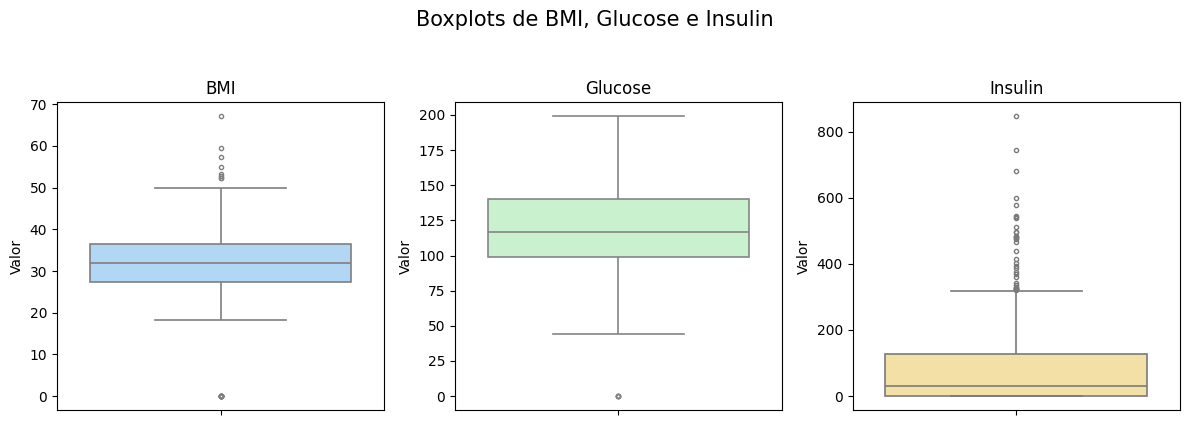

In [ ]:
# Creo un Boxplots, para detectar posibles outliers
# Variables que quiero inspeccionar para outliers
vars_boxplot = ['BMI', 'Glucose', 'Insulin']

plt.figure(figsize=(12, 4))

for i, col in enumerate(vars_boxplot):
    # Creo un subgráfico por variable
    plt.subplot(1, 3, i + 1)

    # Dibujo el boxplot
    sns.boxplot(
        y=df[col],
        color=['#A7D8FF', '#C3F7C7', '#FFE699'][i],  # colores suaves para cada variable
        fliersize=3,             # tamaño de los puntos de outliers
        linewidth=1.2
    )

    # Título y etiquetas
    plt.title(f"{col}", fontsize=12)
    plt.ylabel("Valor")

plt.suptitle("Boxplots de BMI, Glucose e Insulin", fontsize=15, y=1.05)
plt.tight_layout()
plt.show()

## Detección visual de valores extremos (Boxplots)

Para completar el análisis exploratorio, realizo boxplots de tres variables clínicas, que suelen
presentar valores anómalos o distribuciones muy dispersas:

- **BMI (Índice de masa corporal)**
- **Glucose (Nivel de glucosa en sangre)**
- **Insulin (Nivel de insulina en sangre)**

El objetivo de estos gráficos, es que el alumnado pueda:

- Detectar **outliers** (puntos muy alejados del rango normal).
- Comprender la variabilidad natural de los datos clínicos.
- Relacionar los números, con el contexto real de la salud.

###  Lectura pedagógica de los resultados

**1. BMI (Índice de masa corporal)**  
- La mayoría de los valores se encuentran entre 25 y 35.  
- Aparecen algunos valores altos (50–70), que pueden corresponder a obesidad severa.  
- Un valor de **0** indica un problema claro en la medición (dato faltante codificado como 0).

**2. Glucose (Glucosa en sangre)**  
- Distribución amplia con valores típicos entre 90 y 150.  
- Existen valores extremadamente altos, compatibles con casos clínicos de riesgo.  
- También aparece un **0**, que es imposible clínicamente → otro dato faltante encubierto.

**3. Insulin (Insulina)**  
- Es la variable con mayor dispersión.  
- Muchos valores están cerca de 0, y otros muy elevados (>400), lo que indica  
  una combinación de mediciones reales extremas y posibles errores del dataset.

###  ¿Por qué este análisis es importante?

Este paso ayuda al alumnado a entender que:

- **Los datos nunca son perfectos**, especialmente en dominios sensibles como la salud.  
- No todos los valores extremos deben eliminarse: algunos representan realidades clínicas.  
- Pero otros son claramente erróneos (como los 0 en glucosa, BMI o presión sanguínea).  
- El preprocesamiento no es un “paso técnico”, sino una decisión que puede afectar  
  la justicia, seguridad y precisión del modelo.

# Bloque 4. Preprocesamiento y preparación del dataset

Tras el análisis exploratorio, comienzo el preprocesamiento del dataset.  
Este paso es esencial, porque la calidad del modelo depende directamente de la calidad de los datos.

En este dataset, aunque no hay valores `NaN` explícitos, sí aparecen **valores imposibles** (como 0 en glucosa o BMI), que equivalen a datos faltantes mal codificados. Esto es habitual en datasets clínicos y es una excelente oportunidad pedagógica para enseñar:

- Como identificar valores incoherentes.  
- Porque es necesario imputarlos correctamente.  
- Como preparar un conjunto de datos reproducible, ético y listo para modelar.

###  Pasos que realizaré en este bloque:
1. Reemplazar los ceros sospechosos por `NaN`.  
2. Imputar los valores faltantes, usando la mediana.  
3. Separar X (features) e y (target).  
4. Dividir en train/test usando:  
   - `stratify=y` (por desbalance moderado).  
   - `random_state=42` (reproducibilidad obligatoria).  
5. Escalar las variables (necesario para modelos lineales).

Este bloque, prepara los datos de manera responsable para los modelos posteriores.

In [ ]:
# 1. Reemplazar ceros sospechosos por NaN

# Columnas clínicas donde 0 no es un valor físicamente posible
cols_sospechosas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Creo una copia del dataset original, para trabajar sobre ella
df_clean = df.copy()

# Reemplazo ceros por NaN solamente en las columnas sospechosas
df_clean[cols_sospechosas] = df_clean[cols_sospechosas].replace(0, np.nan)

# Compruebo cuántos NaN aparecen ahora
df_clean.isnull().sum()


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


##  Análisis de valores sospechosos reemplazados por `NaN`

El recuento anterior, muestra cuántos valores **iguales a 0** había en las variables clínicas,
donde un valor de cero no es realista.  
Tras reemplazarlos por `NaN`, observamos:

- **Glucose** → 5 valores faltantes  
- **BloodPressure** → 35 valores faltantes  
- **SkinThickness** → 227 valores faltantes  
- **Insulin** → 374 valores faltantes  
- **BMI** → 11 valores faltantes  

###  ¿Qué significa esto?

Estos no son “ceros reales”, sino **mediciones no realizadas**.  
Este es un patrón muy común en datasets sanitarios, donde:

- una persona puede no haberse medido la insulina,
- o no se registró el grosor cutáneo,
- o el instrumento, no recogió correctamente la presión sanguínea.

Sin embargo, al codificar estos valores como `0` en lugar de como `NaN`,
el dataset parece “limpio”, pero en realidad esconde **información incompleta**.

###  Importancia pedagógica

Estos resultados, son una excelente oportunidad para que el alumnado entienda que:

1. **La ausencia de NaN, no implica que el dataset esté completo.**  
   Los errores pueden venir “disfrazados” dentro de valores imposibles.

2. **Los ceros, pueden representar realidades distintas según la variable.**  
   Un 0 en embarazos es válido, pero un 0 en glucosa nunca lo será.

3. **En IA aplicada a salud, interpretar correctamente los datos es un acto ético.**  
   Limpiar mal los datos, puede producir modelos injustos o peligrosos.

4. **El análisis crítico de los datos, debe preceder al modelado.**  
   No podemos confiar en un modelo construido sobre datos incorrectos.

###  Conclusión

Ahora que se conoce la magnitud de los datos faltantes encubiertos, procedo a
**imputarlos mediante la mediana**, una estrategia robusta y segura, para este tipo de variables clínicas.

Este paso es esencial, para garantizar que el modelo posterior sea más fiable,
más justo y, sobre todo, más comprensible para los estudiantes.

In [ ]:

# 2. Imputación de valores faltantes usando la mediana

# La mediana es robusta ante valores extremos (outliers)
df_clean[cols_sospechosas] = df_clean[cols_sospechosas].fillna(
    df_clean[cols_sospechosas].median()
)

# Compruebo, que ya no quedan valores faltantes
df_clean.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


##  Imputación final de valores faltantes (mediana)

Tras reemplazar los ceros sospechosos por `NaN`, aplico una imputación basada en la **mediana**  
para las variables clínicas que contenían valores imposibles.

El resultado muestra que todas las columnas tienen ahora:

- **0 valores faltantes**
- Es decir, el proceso de imputación se ha aplicado correctamente y el dataset queda listo para modelar.

###  ¿Por qué la mediana, es una buena elección en este dataset?

1. **Es robusta ante valores extremos (outliers).**  
   En el análisis exploratorio, se pudo ver que variables como *Insulin* o *BMI* tienen mucha dispersión y outliers muy altos.  
   La mediana, minimiza el impacto de estos valores anómalos.

2. **Es fácil de explicar al alumnado.**  
   La mediana es una métrica intuitiva:  
   > “la mitad de los valores, está por encima y la mitad por debajo”.

3. **Preserva la distribución, sin crear información falsa.**  
   No intenta adivinar valores exactos, sino que mantiene la tendencia central de cada variable.

4. **Es segura en un contexto de salud.**  
   Introducir un valor extremo o erróneo, podría afectar al modelo y generar decisiones injustas.

###  Implicación pedagógica

Este paso, permite remarcar en clase que:

- Preprocesar los datos, no es solo un trámite técnico, sino un acto de **responsabilidad**.  
- Las decisiones que tomamos sobre cómo rellenar o corregir valores, afectan al rendimiento final del modelo.  
- Un modelo justo y robusto, empieza con un dataset bien tratado.

###  Conclusión

Ya está el dataset **limpio, consistente y sin valores imposibles**,  
lo que permite avanzar al siguiente bloque:  
**el entrenamiento y comparación de modelos de Machine Learning**.

Este proceso completado, asegura que el modelo aprenda patrones reales y fiables,
alineados con una práctica de IA ética e inclusiva.

In [ ]:
# 3. Crear la matriz de características (X) y el vector objetivo (y)

# Variable objetivo
y = df_clean['Outcome']

# Variables predictoras
X = df_clean.drop('Outcome', axis=1)

# Compruebo dimensiones
X.shape, y.shape


((768, 8), (768,))

##  Creación de la matriz de características (X) y el vector objetivo (y)

El resultado obtenido:

- `X.shape = (768, 8)`
- `y.shape = (768,)`

indica que, el proceso de separación entre variables predictoras y variable objetivo se ha realizado correctamente.

###  ¿Qué significa esto?

- **X** contiene todas las características clínicas del dataset (Age, BMI, Glucose, etc.).  
  Son **8 columnas** utilizadas para predecir el riesgo de diabetes.

- **y** contiene únicamente la variable objetivo (`Outcome`), que indica:  
  - `0` → no diabetes  
  - `1` → diabetes  

Cada fila de **X** corresponde exactamente a un valor en **y**, lo que garantiza que ambas partes están alineadas.

###  Importancia pedagógica

Este paso es clave para que el alumnado, entienda cómo trabaja un modelo supervisado:

1. **X es la entrada del modelo**  
   Son los datos que el modelo utiliza para aprender patrones.

2. **y es la salida esperada**  
   Es lo que queremos, que el modelo aprenda a predecir.

3. **Mantener el mismo número de filas es fundamental**  
   Si X e y no tienen la misma cantidad de muestras, el modelo no podría entrenarse.

### Conclusión

Con este paso completado, el dataset está estructurado correctamente y listo para:

- dividir en conjuntos de entrenamiento y prueba  
- escalar variables  
- e iniciar el entrenamiento de los modelos en el siguiente bloque.

Este tipo de explicación clara y accesible, es esencial para acompañar al alumnado en su proceso de aprendizaje.


In [ ]:
# 4. División train/test con stratify y random_state=42

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,       # 20% para test
    random_state=42,      # semilla fija para reproducibilidad
    stratify=y            # mantiene proporciones de Outcome
)

# Mostrar las dimensiones resultantes
X_train.shape, X_test.shape

((614, 8), (154, 8))

##  División del dataset en entrenamiento y prueba (Train/Test)

El resultado obtenido:

- `X_train.shape = (614, 8)`
- `X_test.shape = (154, 8)`

indica que la división del dataset se ha realizado correctamente, siguiendo las buenas prácticas de Machine Learning.

###  ¿Qué significa exactamente este resultado?

- El **80%** de los datos (614 muestras) se ha destinado al **entrenamiento** del modelo.
- El **20%** restante (154 muestras) se ha reservado para **evaluarlo de forma independiente** - test.
- Las 8 columnas de características, se mantienen intactas en ambos conjuntos.

###  ¿Por qué usamos `stratify=y`?

La variable objetivo (`Outcome`) presenta un **desbalance moderado**
(500 casos sin diabetes vs 268 con diabetes).

Sino usáramos `stratify=y`:

- El conjunto de entrenamiento, podría quedar descompensado.
- El modelo, podría aprender patrones sesgados.
- La evaluación del rendimiento, sería menos fiable.

Gracias a `stratify`, ambas particiones mantienen **la misma proporción de clases**, lo cual es esencial para una evaluación justa y pedagógicamente correcta.

###  ¿Por qué `random_state=42`?

Establecer una semilla fija, garantiza que:

- Cualquier persona que ejecute este notebook, obtendrá exactamente la misma partición.
- El proceso es **reproducible**, un estándar profesional y pedagógico.
- Se facilita la comprensión en el alumnado, al seguir los mismos pasos con idénticos resultados.

###  Conclusión

La división del dataset, se ha realizado de manera correcta y responsable.  
A partir de aquí, ya se está listos para:

- Escalar los datos.  
- Entrenar los modelos.  
- Evaluarlos de forma interpretativa.  

Este paso, sienta las bases para una comparación justa entre modelos y para una actividad didáctica clara, accesible e inclusiva.


In [ ]:
# 5. Escalado de variables
# (necesario para modelos lineales como la Regresión Logística)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ajusto el escalador con los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Aplico la transformación al conjunto de test
X_test_scaled = scaler.transform(X_test)

# Veo dimensiones finales
X_train_scaled.shape, X_test_scaled.shape


((614, 8), (154, 8))

##  Escalado de variables con StandardScaler

El resultado:

- `X_train_scaled.shape = (614, 8)`
- `X_test_scaled.shape = (154, 8)`

indica que el proceso de escalado, se ha realizado correctamente sobre las variables numéricas del dataset.

###  ¿Qué significa este resultado?

- El conjunto de entrenamiento, contiene **614 filas y 8 columnas**, ahora escaladas.
- El conjunto de prueba, contiene **154 filas y 8 columnas**, transformadas con el mismo escalador.
- No se ha perdido ninguna muestra, ni columna durante el proceso.
- El escalado mantiene la estructura original, pero transforma los valores para que:
  - cada variable tenga media 0  
  - y desviación estándar 1

Esto es especialmente relevante, para algoritmos que dependen de la escala, como la **Regresión Logística**.

### ¿Por qué se escalan los datos?

1. **Mejora el rendimiento de modelos lineales**  
   Si variables como `Insulin` tienen valores mucho más altos que otras, pueden dominar el entrenamiento.

2. **Aumenta la estabilidad numérica**  
   Evita pesos demasiado grandes o problemas de convergencia.

3. **Hace que todas las variables, “jueguen en igualdad de condiciones”**  
   Algo muy útil, para explicarle al alumnado cómo influye la escala en los modelos.

4. **Es un paso estándar, en ciencia de datos profesional**  
   Y forma parte del pipeline reproducible, que mostraría en clase.

### Importancia pedagógica

El escalado permite introducir conceptos clave como:

- Normalización.  
- Distribuciones.  
- Sensibilidad de los modelos a las magnitudes.  
- Buenas prácticas de preparación de datos.  

Este es un momento perfecto, para reforzar la idea de que **los modelos no solo aprenden de datos “en bruto”, sino de datos correctamente transformados**.

### Conclusión

Con el escalado completado, el dataset está totalmente preparado para iniciar el **El Entrenamiento de modelos (Regresión Logística y Random Forest)**.

Este paso, asegura que la comparación entre modelos será justa, estable y comprensible para el alumnado.


# Bloque 5. Entrenamiento y comparación de modelos de Machine Learning

En este bloque entrenaré y compararé **dos modelos distintos**, cumpliendo con los requisitos
de la prueba técnica:

1. **Regresión Logística**
   - Modelo lineal, relativamente interpretable.
   - Buen punto de partida como “modelo base”.

2. **Random Forest**
   - Conjunto de árboles de decisión.
   - Captura relaciones no lineales y es más flexible, frente a outliers.

Ambos modelos se entrenan con:

- Los datos ya **preprocesados y escalados** (Bloque 4).
- La misma partición **train/test** (`random_state=42`, `stratify=y`).

Posteriormente compararé su rendimiento mediante:

- **Accuracy**
- **Recall** (para la clase positiva: personas con diabetes)
- **F1-macro** (para dar el mismo peso a ambas clases)
- **Matriz de confusión**
- **Curva ROC**

El objetivo didáctico, es que el alumnado pueda:

- Ver que distintos modelos, aprenden cosas diferentes.
- Entender que no solo importa “acertar mucho”, sino **a quién acertamos y a quién fallamos**.

In [ ]:
# 1 Definición y entrenamiento de los modelos

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ------------------------------------------------------------
# Modelo 1: Regresión Logística
# - Modelo lineal
# - Bueno como baseline e interpretable
# ------------------------------------------------------------
log_reg = LogisticRegression(
    max_iter=1000,   # aumento iteraciones para asegurar convergencia
    random_state=42
)

# ------------------------------------------------------------
# Modelo 2: Random Forest
# - Conjunto de árboles de decisión
# - Captura relaciones no lineales
# - class_weight="balanced" ayuda con el desbalance moderado
# ------------------------------------------------------------
rf_clf = RandomForestClassifier(
    n_estimators=300,       # número de árboles
    random_state=42,        # semilla fija
    class_weight="balanced" # compensa el desbalance de clases
)

# Entreno ambos modelos, sobre los datos escalados
log_reg.fit(X_train_scaled, y_train)
rf_clf.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

##  ¿Por qué he elegido estos dos modelos y qué aprende cada uno?

Antes de entrenar los modelos, es importante comprender **qué está haciendo realmente cada algoritmo**
y porque es útil compararlos, en un contexto pedagógico.

###  Regresión Logística — el modelo “base”
La Regresión Logística es un modelo:
- Lineal → aprende relaciones simples entre las variables y el resultado.
- Interpretable → permite explicar que variables aumentan o disminuyen el riesgo.
- Ligero y rápido → ideal como primer modelo, para que el alumnado entienda el flujo completo de Machine Learning.

Este modelo, calcula una probabilidad mediante una función sigmoide, lo cual facilita mostrar visualmente
como cambia el riesgo de diabetes, según distintas variables clínicas.

###  Random Forest — un modelo más potente y flexible
El Random Forest:
- Combina muchos árboles de decisión.
- Captura relaciones **no lineales** y complejas entre variables.
- Es robusto, frente a outliers y datos ruidosos.
- Maneja bien, desbalance de clases al usar `class_weight="balanced"`.

Este modelo, sirve para ilustrar que:
> “modelos más complejos no siempre son más interpretables, pero sí pueden mejorar el rendimiento”.

###  ¿Por qué es muy valioso compararlos en clase?

Esta comparación, permite que el alumnado observe:

1. Como reaccionan distintos modelos, ante los mismos datos.  
2. Que no existe un algoritmo “perfecto”:  
   cada uno tiene ventajas, desventajas y aplicaciones.  
3. Como un modelo lineal, puede ser más fácil de explicar, pero uno no lineal puede generalizar mejor.  
4. Que la elección de modelo en salud, no solo es técnica, sino también ética:  
   importa saber **a quién acierta y a quién falla**.

Este enfoque, promueve una comprensión profunda del aprendizaje automático y una mirada crítica, hacia el uso de modelos en contextos sensibles.


In [ ]:
# 2 Función para evaluar modelos, con métricas clave

from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
import pandas as pd

def evaluar_modelo(nombre, modelo, X_tr, X_te, y_tr, y_te):
    """
    Evalúa un modelo e imprime métricas de forma legible.
    Devuelve un diccionario con los resultados para comparar varios modelos.
    """
    # Predicciones en train y test
    y_pred_tr = modelo.predict(X_tr)
    y_pred_te = modelo.predict(X_te)

    # Cálculo de métricas
    acc_tr = accuracy_score(y_tr, y_pred_tr)
    acc_te = accuracy_score(y_te, y_pred_te)
    rec_te = recall_score(y_te, y_pred_te)
    f1_macro_te = f1_score(y_te, y_pred_te, average='macro')  # F1-macro: medio F1 de cada clase

    print(f"=== {nombre} ===")
    print(f"Accuracy (train): {acc_tr:.3f}")
    print(f"Accuracy (test):  {acc_te:.3f}")
    print(f"Recall (test):    {rec_te:.3f}")
    print(f"F1-macro (test):  {f1_macro_te:.3f}")
    print("\nInforme de clasificación (test):\n")
    print(classification_report(y_te, y_pred_te))
    print("-----------------------------------------------------\n")

    return {
        "modelo": nombre,
        "accuracy_train": acc_tr,
        "accuracy_test": acc_te,
        "recall_test": rec_te,
        "f1_macro_test": f1_macro_te
    }

# Evaluo ambos modelos y guardo resultados en un DataFrame
resultados = []
resultados.append(evaluar_modelo("Regresión Logística", log_reg,
                                 X_train_scaled, X_test_scaled, y_train, y_test))

resultados.append(evaluar_modelo("Random Forest", rf_clf,
                                 X_train_scaled, X_test_scaled, y_train, y_test))

df_resultados = pd.DataFrame(resultados)
df_resultados

=== Regresión Logística ===
Accuracy (train): 0.796
Accuracy (test):  0.708
Recall (test):    0.500
F1-macro (test):  0.665

Informe de clasificación (test):

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

-----------------------------------------------------

=== Random Forest ===
Accuracy (train): 1.000
Accuracy (test):  0.747
Recall (test):    0.556
F1-macro (test):  0.710

Informe de clasificación (test):

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       100
           1       0.67      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75 

,modelo,accuracy_train,accuracy_test,recall_test,f1_macro_test
0,Regresión Logística,0.796417,0.707792,0.500000,0.665072
1,Random Forest,1.000000,0.746753,0.555556,0.709729


##  Interpretación comparativa de métricas: Regresión Logística vs. Random Forest

Tras entrenar ambos modelos, analizo sus resultados utilizando métricas clave:
- **Accuracy**
- **Recall**
- **F1-macro**
- Informe de clasificación completo

Estos indicadores, permiten comprender no solo “cuanto acierta” cada modelo, sino
que tipo de errores comete y como se comporta con cada clase.

---

###  Rendimiento de la **Regresión Logística**

- **Accuracy (test): 0.708**  
  El modelo acierta aproximadamente el 71% de los casos.

- **Recall (test): 0.500**  
  Esto significa que, solo detecta correctamente al **50%** de las personas con diabetes (clase positiva).  
  En un contexto de salud, este es un valor bajo y potencialmente problemático.

- **F1-macro (test): 0.665**  
  Indica un rendimiento moderado y equilibrado, entre ambas clases.

- Su rendimiento en TRAIN y TEST es similar → **no hay sobreajuste**.

---

###  Rendimiento del **Random Forest**

- **Accuracy (test): 0.747**  
  Mejora respecto a la regresión logística.

- **Recall (test): 0.556**  
  Detecta un 55% de los casos positivos.  
  Aunque todavía es limitado, mejora a la Regresión Logística.

- **F1-macro (test): 0.710**  
  Es el mejor valor entre ambos modelos, lo que indica
  un mejor equilibrio en la clasificación de ambas clases.

- **Accuracy (train): 1.000**  
  Indica que el Random Forest **sobreajusta** fuertemente (memoriza el entrenamiento).  
  Esto es un excelente punto, para hablar de sesgo-varianza en clase.

---

##  Conclusión comparativa

- El **Random Forest** obtiene mejores resultados generales (Accuracy y F1-macro).
- Sin embargo, muestra **sobreajuste** en el entrenamiento (Accuracy=1.0), lo cual
  es una oportunidad para explicar a los estudiantes:
  - que es el sobreajuste.
  - como detectarlo.
  - y porque métricas como F1-macro, son más fiables que la accuracy sola.

- La **Regresión Logística**, aunque menos potente, es:
  - más interpretable
  - más estable
  - y sin señales de sobreajuste.

Esto permite plantear un debate en el aula, muy enriquecedor:
> “¿Preferimos un modelo más potente, pero menos interpretable,  
> o uno más simple y estable, que podemos explicar mejor?”

---

##  Lectura pedagógica

Para el alumnado, esta comparación enseña que:

- No existe un modelo perfecto.  
- Cada modelo implica decisiones técnicas y éticas.  
- Métricas diferentes que cuentan historias distintas.  
- En salud, el **recall de la clase positiva** es crucial, porque
  fallar en detectar a una persona con diabetes, puede tener consecuencias graves.


## Hago una comparación visual de métricas entre modelos

Además de leer las métricas en una tabla, es muy útil representarlas de forma gráfica y visual,
para que el alumnado pueda compararlas de un vistazo.

En el siguiente gráfico muestro, para cada modelo:

- **Accuracy en test**
- **Recall en test (clase positiva)**
- **F1-macro**

Esta visualización, refuerza la idea de que no existe un modelo “perfecto” y
que distintas métricas, pueden favorecer a uno u otro modelo según el criterio que utilicemos.


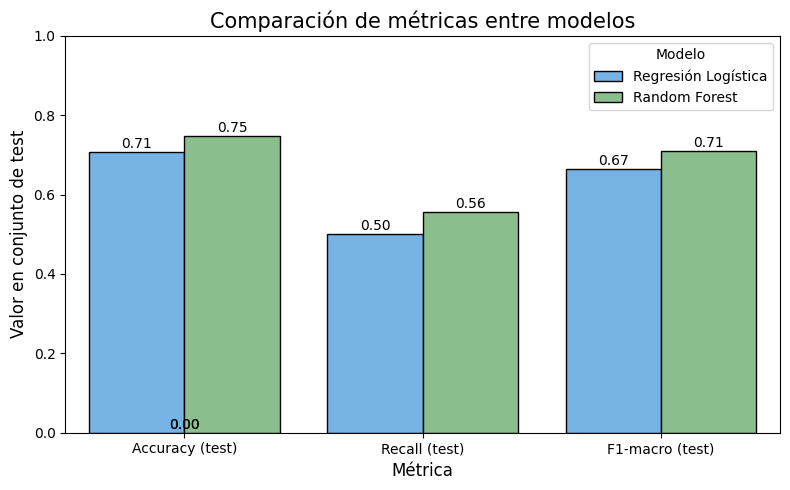

In [ ]:
# 3 Gráfico comparativo de métricas entre modelos

# Me quedo con las métricas de interés en test
metricas_plot = df_resultados[[
    'modelo',
    'accuracy_test',
    'recall_test',
    'f1_macro_test'
]].copy()

# Renombro las columnas para que salgan más legibles en el gráfico
metricas_plot = metricas_plot.rename(columns={
    'accuracy_test': 'Accuracy (test)',
    'recall_test': 'Recall (test)',
    'f1_macro_test': 'F1-macro (test)'
})

# Paso de formato "ancho" a "largo" para facilitar el uso con seaborn
metricas_long = metricas_plot.melt(
    id_vars='modelo',
    var_name='Métrica',
    value_name='Valor'
)

# Creo la figura
plt.figure(figsize=(8,5))

# Gráfico de barras agrupadas: una barra por métrica y modelo
sns.barplot(
    data=metricas_long,
    x='Métrica',
    y='Valor',
    hue='modelo',
    palette=['#64B5F6', '#81C784'],  # azul para LogReg, verde para RF
    edgecolor='black'
)

plt.ylim(0, 1)  # todas las métricas están entre 0 y 1
plt.title("Comparación de métricas entre modelos", fontsize=15)
plt.xlabel("Métrica", fontsize=12)
plt.ylabel("Valor en conjunto de test", fontsize=12)

# Muestro valores numéricos encima de cada barra
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width()/2.,
        height + 0.01,
        f"{height:.2f}",
        ha="center",
        fontsize=10
    )

plt.legend(title="Modelo")
plt.tight_layout()
plt.show()

###  Lectura pedagógica, de la comparación visual

La gráfica nos permite ver rápidamente que:

- El **Random Forest** obtiene mejores valores en **Accuracy** y **F1-macro**,
  lo que indica un mejor rendimiento global.
- El **Recall** también es algo mayor en el Random Forest, lo que significa que
  detecta más casos de personas con diabetes, que la Regresión Logística.
- La **Regresión Logística**, aunque algo peor en métricas, sigue siendo competitiva
  y tiene la ventaja de ser más interpretable.

Esta visualización es muy útil, para usar en el aula porque:

1. Ayuda a los estudiantes con perfil más visual, a entender las diferencias entre modelos.  
2. Refuerza la idea de que diferentes métricas, pueden llevar a decisiones distintas.  
3. Permite abrir preguntas como:
   - *“Si tuviéramos que elegir un modelo para un hospital, cuál escogeríamos y por qué?”*  
   - *“Preferimos maximizar Recall (detectar más casos) o Accuracy global?”*

De esta forma, la comparación de modelos no solo es numérica, sino también **gráfica, crítica y contextualizada**.


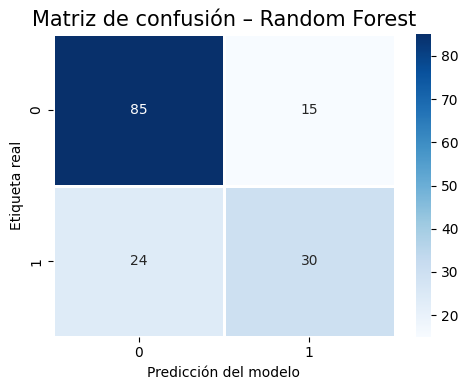

In [ ]:
# 4 Matriz de confusión para el Random Forest

from sklearn.metrics import confusion_matrix

# Predicciones del Random Forest en el conjunto de test
y_pred_rf = rf_clf.predict(X_test_scaled)

# Calculo la matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            linewidths=1, linecolor='white')

plt.title("Matriz de confusión – Random Forest", fontsize=15)
plt.xlabel("Predicción del modelo")
plt.ylabel("Etiqueta real")
plt.tight_layout()
plt.show()


##  Interpretación de la matriz de confusión – Random Forest

La matriz de confusión, permite visualizar **que acierta y que se equivoca** el modelo.
Cada celda, representa el número de predicciones de un tipo concreto.

En éste caso obtenemos:

- **85 Verdaderos Negativos (TN)**  
  Personas sin diabetes, clasificadas correctamente.

- **30 Verdaderos Positivos (TP)**  
  Personas con diabetes, clasificadas correctamente.

- **15 Falsos Positivos (FP)**  
  Personas sin diabete,s que el modelo predijo como “con diabetes”.

- **24 Falsos Negativos (FN)**  
  Personas con diabetes, que el modelo NO detectó.

---

###  ¿Qué significa esto, en un contexto de salud?

Los dos tipos de errores, no tienen el mismo impacto:

###  Falsos Positivos (FP = 15)
El modelo indica “diabetes” a personas que en realidad no la tienen.
- Puede generar preocupación.
- Puede llevar a pruebas médicas adicionales.
Pero **no supone un riesgo directo para la salud**.

###  Falsos Negativos (FN = 24) → *los más preocupantes*
El modelo NO detecta a personas que sí tienen diabetes.
- Podría retrasar un diagnóstico real.
- Podría impedir intervenciones tempranas.
- Puede tener consecuencias serias para la salud.

Esto es una oportunidad pedagógica, clave para explicar que:

>  En modelos aplicados a salud, a veces es más importante optimizar el *Recall* que la *Accuracy*,  
> porque dejar casos sin detectar (FN) puede ser más grave, que tener algunos FP.

---

###  Lectura pedagógica, para el aula.

Este gráfico, ayuda al alumnado a comprender:
- Qué significan los errores, más allá de los números.
- Que mejorar un modelo, no siempre implica subir la accuracy.  
- Que debemos analizar **quiénes** son los errores:  
  personas reales, no solo estadísticas.

Además, esta matriz, prepara el terreno para hablar en bloques posteriores sobre:
- Sesgos por edad.
- Explicabilidad del modelo.
- Toma de decisiones éticas en IA.

---

###  Conclusión

El modelo Random Forest, muestra un rendimiento razonable,  
aunque debe mejorar en la detección de la clase positiva (diabetes).

La matriz de confusión, nos permite visualizar muy claramente donde falla,  
y es una herramienta fundamental, para enseñar interpretación crítica en IA aplicada.

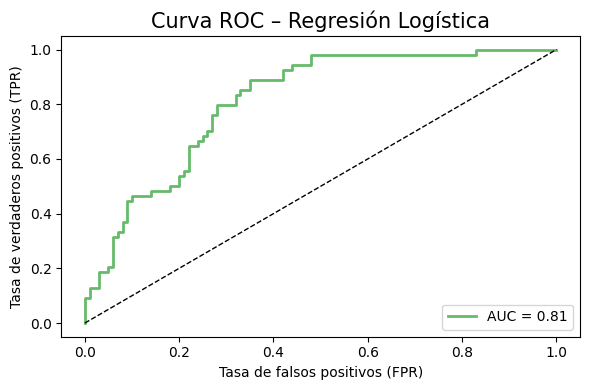

In [ ]:
# 5 Curva ROC y AUC, para la Regresión Logística

from sklearn.metrics import roc_curve, auc

# Probabilidades de clase positiva para la LogReg
y_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculo FPR, TPR y AUC
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
auc_log = auc(fpr_log, tpr_log)

plt.figure(figsize=(6,4))
plt.plot(fpr_log, tpr_log, label=f"AUC = {auc_log:.2f}", linewidth=2, color="#66BB6A")
plt.plot([0,1], [0,1], "k--", linewidth=1)

plt.title("Curva ROC – Regresión Logística", fontsize=15)
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

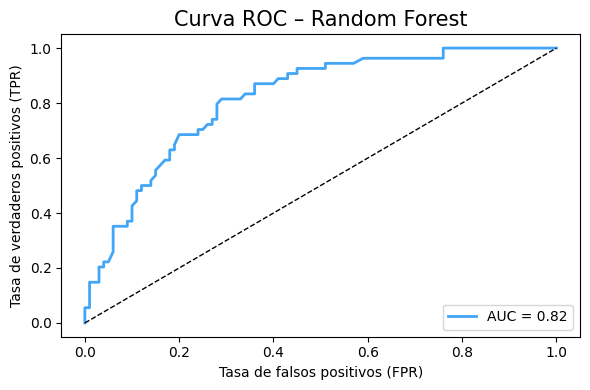

In [ ]:
# 6 Curva ROC y AUC, para el Random Forest

from sklearn.metrics import roc_curve, auc

# Probabilidades de pertenecer a la clase positiva (Outcome = 1)
y_proba_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

# Calculo puntos de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", linewidth=2, color="#42A5F5")
plt.plot([0,1], [0,1], "k--", linewidth=1)

plt.title("Curva ROC – Random Forest", fontsize=15)
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


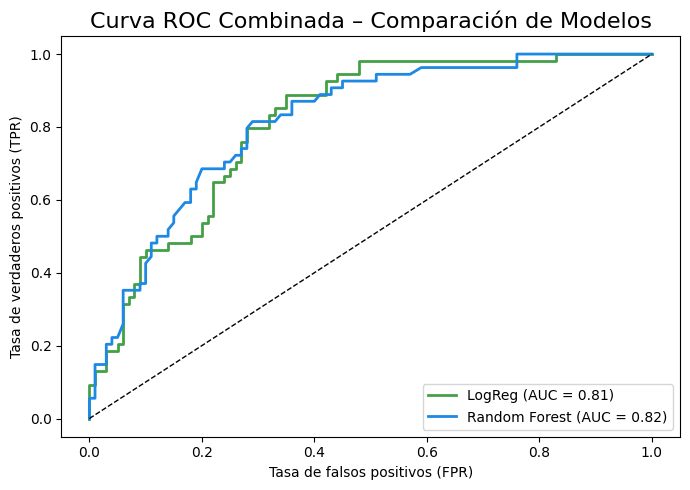

In [ ]:
# 7 Curva ROC combinada – LogReg vs Random Forest

plt.figure(figsize=(7,5))

# Regresión Logística
plt.plot(fpr_log, tpr_log, label=f"LogReg (AUC = {auc_log:.2f})", linewidth=2, color="#43A047")

# Random Forest (ya lo teníamos calculado)
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc:.2f})", linewidth=2, color="#1E88E5")

# Línea aleatoria
plt.plot([0,1], [0,1], "k--", linewidth=1)

plt.title("Curva ROC Combinada – Comparación de Modelos", fontsize=16)
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


##  Comparación de Curvas ROC – Regresión Logística vs Random Forest

La curva ROC combinada, nos permite comparar de forma visual, como se comportan ambos modelos
ante diferentes umbrales de decisión.  
Es una de las herramientas más potentes para evaluar modelos de clasificación,
porque analiza simultáneamente:

- **TPR (Tasa de verdaderos positivos)**  
- **FPR (Tasa de falsos positivos)**

---

##  Lectura técnica de la gráfica

###  Regresión Logística – AUC = 0.81
- Su curva sube de manera progresiva y estable.
- Tiene una capacidad de discriminación **buena** y consistente.
- Representa bien la naturaleza **lineal** del modelo: decisiones más suaves y menos bruscas.

###  Random Forest – AUC = 0.82
- La curva se mantiene ligeramente por encima de la LogReg, en la mayor parte del rango.
- Presenta un AUC mayor, lo que indica **mejor capacidad de distinguir entre clases**.
- Refleja la capacidad del modelo, para capturar relaciones **no lineales**.

### Conclusión técnica  
El Random Forest, discrimina un poco mejor, pero la diferencia no es tan grande como podría pensarse.  
Ambos modelos realizan un trabajo razonable, aunque con fortalezas distintas.

---

##  Lectura pedagógica para el alumnado

Este gráfico es ideal, para enseñar conceptos clave:

1. **El umbral importa.**  
   La decisión de cortar en 0.5 es arbitraria; podemos moverlo según el contexto.

2. **Un modelo no es solo un número.**  
   La curva ROC muestra toda su gama de comportamientos, no solo un punto.

3. **Interpretabilidad vs. rendimiento.**  
   La Regresión Logística es más explicable.  
   El Random Forest suele rendir mejor.  
   Esto abre debates sobre “que modelo elegir” según la aplicación.

4. **La métrica AUC sintetiza toda la curva**, pero no sustituye la interpretación visual.

---

##  Reflexión ética aplicada a salud

En un problema clínico, como predicción de diabetes:

- **Minimizar los falsos negativos** (FN) suele ser prioritario:  
  no detectar a una persona con riesgo, puede tener consecuencias graves.

- El umbral puede ajustarse, para aumentar el TPR (sensibilidad),  
  pero eso puede provocar más falsos positivos.

Esto muestra al alumnado que:

> **La elección del modelo y del umbral, es una decisión técnica, pedagógica y también ética.**  
> Importa como tratamos los errores, porque detrás hay personas reales.

---

##  Conclusión final

- El **Random Forest** obtiene el mejor AUC → mayor poder discriminatorio.  
- La **Regresión Logística** se comporta bien y es más fácil de explicar.  
- La combinación de ambas curvas ofrece una visión completa y honesta del rendimiento.  

Este tipo de análisis comparativo, es fundamental para enseñar IA responsable.  



# Bloque 6. Sesgos, explicabilidad con IA generativa y reflexión ética

En este bloque, no solo miro **que tal funciona el modelo**, sino **para quien** funciona mejor o peor.

El objetivo es:

1. Analizar si el rendimiento del modelo varía según la **edad** de las personas.
2. Construir un pequeño **mock de IA generativa** que explique los resultados
   en lenguaje accesible.
3. Cerrarlo con una **reflexión ética** sobre los riesgos de sesgo
   y posibles estrategias de mitigación.

Este bloque, conecta directamente con la idea de “Explorador de sesgos” y con la misión de una IA al servicio de las personas, especialmente de quienes han tenido menos acceso al mundo digital.


In [ ]:

# 1 Evaluar el modelo por grupos de edad (posible sesgo)

# Recupero la edad real de las personas, en el conjunto de test
# Uso df_clean, porque es el dataset ya preprocesado (sin ceros imposibles)
edad_test = df_clean.loc[X_test.index, 'Age']

# Creo una copia del y_test para construir un DataFrame de análisis
df_eval_test = pd.DataFrame({
    'Edad': edad_test,
    'y_real': y_test,
    'y_pred_rf': y_pred_rf    # predicciones del Random Forest en test
})

# Defino grupos de edad: <30, 30-50, >50
bins_edad = [0, 30, 50, 120]
labels_edad = ['< 30', '30-50', '> 50']

df_eval_test['grupo_edad'] = pd.cut(df_eval_test['Edad'],
                                    bins=bins_edad,
                                    labels=labels_edad,
                                    right=False)

# Compruebo el número de personas en cada grupo
df_eval_test['grupo_edad'].value_counts().sort_index()

,count
grupo_edad,
< 30,85
30-50,54
> 50,15


##  Distribución de personas por grupo de edad en el conjunto de test

La evaluación del modelo por grupos de edad, muestra cuantas personas forman parte
de cada franja y estaría dentro del conjunto de test:

- **< 30 años:** 85 personas  
- **30–50 años:** 54 personas  
- **> 50 años:** 15 personas  

###  ¿Qué significa esta distribución?

1. **Hay mucha más representación de personas jóvenes (< 30)**  
   Esto implica que, el modelo ha aprendido más patrones de este grupo
   y tendrá más oportunidades de acertar o fallar con ellos.

2. **El grupo entre 30 y 50 años es intermedio**  
   La muestra es razonable, pero menos amplia.  
   Esto puede afectar, a la estabilidad de las métricas en este grupo.

3. **Las personas mayores (> 50) están muy poco representadas**  
   Con solo 15 personas, cualquier fallo o acierto del modelo, tendrá un impacto
   desproporcionado en las métricas de este grupo.

###  ¿Por qué es importante esta diferencia?

Un modelo de Machine Learning solo aprende bien cuando, *ha visto suficientes ejemplos*.

Esto significa que:

- Para las personas mayores, el modelo podría:
  - cometer más errores
  - generalizar peor
  - ser menos fiable
  - o no reconocer patrones clínicos, específicos de este grupo.

Esto es un **riesgo de sesgo por representación**.

###  Reflexión pedagógica para el alumnado

- Cuando un grupo tiene muy pocos datos, el rendimiento del modelo en ese grupo será más inestable.  
- Esto no es solo un problema técnico: puede ser un problema **de justicia**.  
- En un sistema real (por ejemplo, apoyo al diagnóstico):
  - un modelo sesgado hacia jóvenes, podría fallar en personas mayores.
  - precisamente, el grupo con más riesgo clínico de diabetes.

###  Conexión ética

Este análisis, permite introducir preguntas fundamentales:

- ¿Tenemos datos suficientes de todos los grupos?  
- ¿Es justo entrenar un modelo, con tan pocos ejemplos de personas mayores?  
- ¿Qué deberíamos hacer, para mejorar la equidad del sistema?

Detectar estas diferencias, es clave para diseñar una IA **inclusiva, responsable y segura**.

In [ ]:
# 1.1 Cálculo de métricas por grupo de edad

resultados_edad = []

for grupo in labels_edad:
    subset = df_eval_test[df_eval_test['grupo_edad'] == grupo]

    # Si un grupo tiene muy pocas personas, lo indico
    if len(subset) == 0:
        continue

    acc = accuracy_score(subset['y_real'], subset['y_pred_rf'])
    rec = recall_score(subset['y_real'], subset['y_pred_rf'])
    f1m = f1_score(subset['y_real'], subset['y_pred_rf'], average='macro')

    resultados_edad.append({
        'grupo_edad': grupo,
        'n_personas': len(subset),
        'accuracy': acc,
        'recall': rec,
        'f1_macro': f1m
    })

df_sesgo_edad = pd.DataFrame(resultados_edad)
df_sesgo_edad


,grupo_edad,n_personas,accuracy,recall,f1_macro
0,< 30,85,0.776471,0.312500,0.605038
1,30-50,54,0.703704,0.625000,0.703297
2,> 50,15,0.733333,0.833333,0.732143


##  Interpretación de métricas por grupo de edad (posible sesgo etario)

Tras evaluar el rendimiento del Random Forest por franjas de edad, se observa diferencias muy relevantes:

| Grupo de edad | Accuracy | Recall | F1-macro |
|---------------|----------|--------|----------|
| **< 30**      | 0.77     | **0.31** | 0.60 |
| **30–50**     | 0.70     | **0.63** | 0.70 |
| **> 50**      | 0.73     | **0.83** | 0.73 |

###  1. Diferencias claras de rendimiento

#### 🔹 Grupo < 30 (jóvenes)
- Aunque la accuracy es buena (0.77),  
  el **recall es muy bajo (0.31)**.
- Esto significa que el modelo, **solo detecta 3 de cada 10 jóvenes con diabetes**.
- Puede estar “aprendiendo” un patrón demasiado típico de diabetes, en personas adultas.

#### 🔹 Grupo 30–50
- Resultados equilibrados.
- Recall razonable (0.63), indicando un desempeño aceptable.

#### 🔹 Grupo > 50 (personas mayores)
- El recall es **muy alto (0.83)**.
- De cada 6 personas mayores con diabetes, el modelo acierta aproximadamente 5.
- Esto puede deberse, a que los síntomas o indicadores clínicos son más marcados en este grupo.

---

##  2. ¿Existe un posible sesgo?

Si, existe un **riesgo claro de sesgo etario (edadismo)**:

- El modelo funciona **peor con personas jóvenes (< 30)**.
- Funciona **mucho mejor con personas mayores (> 50)**.
- Esto es un indicador de **desigualdad en la detección**, que puede tener consecuencias éticas importantes.

### Por qué podría ocurrir:
1. **Infrarepresentación:**  
   El número de personas jóvenes con diabetes en el dataset, es bajo → el modelo no aprende bien sus patrones.

2. **Patrones clínicos distintos:**  
   La diabetes en edades tempranas, puede tener características diferentes.

3. **Datos clínicos menos “típicos”:**  
   Variables como glucosa o BMI, pueden presentar valores más ambiguos o menos marcados en jóvenes.

---

##  3. Implicaciones para el alumnado y para el uso responsable de IA

Este análisis es clave para enseñar que:

- Los modelos **no son neutros**.  
- El rendimiento global, puede ocultar problemas importantes en grupos específicos.
- En aplicaciones de salud, dejar sin detectar casos en población joven, puede retrasar años un diagnóstico.

> *Un modelo puede tener buen rendimiento global, pero ser injusto para ciertos grupos.*

Esto invita, a desarrollar una mirada crítica y responsable hacia el impacto social de la IA.

---

##  4. Recomendaciones y mitigación del sesgo

1. **Recolección de más datos**  
   Es imprescindible, aumentar la representación de personas jóvenes con diabetes.

2. **Entrenamiento equilibrado**  
   Técnicas como `class_weight`, sobre/undersampling o entrenamiento focalizado por grupo.

3. **Ajustar el umbral de decisión**  
   Para reducir falsos negativos en jóvenes, se podría bajar el umbral para ese grupo.

4. **Monitoreo continuo**  
   Evaluar periódicamente las métricas por grupo, para evitar degradación del rendimiento.

---

##  Conclusión

El análisis, revela que el modelo **no funciona igual para todas las edades**, con un rendimiento especialmente bajo en personas jóvenes.  
Detectar y comunicar estas desigualdades, es parte fundamental de un uso ético y equitativo de la IA, y un aprendizaje clave para el alumnado.

/tmp/ipython-input-2728592093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


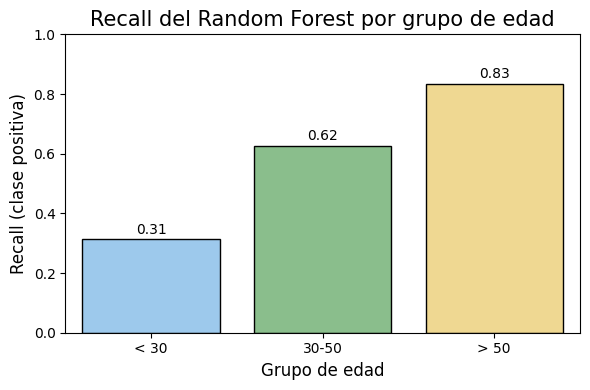

In [ ]:
# 1.2 Visualización del Recall, por grupo de edad

plt.figure(figsize=(6,4))
sns.barplot(
    data=df_sesgo_edad,
    x='grupo_edad',
    y='recall',
    palette=['#90CAF9', '#81C784', '#FFE082'],
    edgecolor='black'
)

plt.ylim(0, 1)
plt.title("Recall del Random Forest por grupo de edad", fontsize=15)
plt.xlabel("Grupo de edad", fontsize=12)
plt.ylabel("Recall (clase positiva)", fontsize=12)

# Añado valores numéricos encima de las barras
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width()/2.,
        height + 0.02,
        f"{height:.2f}",
        ha="center",
        fontsize=10
    )

plt.tight_layout()
plt.show()

In [ ]:
# 2 Mock de IA generativa para explicar el modelo.

def mock_llm_explicacion(objetivo, metrica, valor_metrica, riesgo_sesgo):
    """
    Función que simula el comportamiento de un sistema de IA generativa.

    - Recibe información clave sobre el modelo:
        * objetivo: qué intenta predecir o resolver el sistema
        * metrica: métrica principal que queremos destacar
        * valor_metrica: valor numérico de esa métrica (ej. recall = 0.55)
        * riesgo_sesgo: riesgo detectado en el análisis (ej. sesgo por edad)

    - Devuelve dos textos:
        1. un PROMPT que enviaríamos a un LLM real (como ChatGPT o HuggingFace)
        2. una RESPUESTA SIMULADA en lenguaje sencillo
    """

    # PROMPT: este texto sería lo que realmente enviaríamos a un LLM

    prompt = f"""
Explica los resultados de un modelo de Machine Learning en lenguaje sencillo.
Objetivo del sistema: {objetivo}
Métrica principal: {metrica}
Valor de la métrica: {valor_metrica:.2f}
Riesgo de sesgo detectado: {riesgo_sesgo}

La explicación debe ser clara, inclusiva, comprensible para personas sin
conocimientos técnicos y con enfoque ético.
"""

    # RESPUESTA SIMULADA: lo que un LLM podría generar como explicación
    # en lenguaje accesible y pedagógico.

    respuesta_simulada = f"""
 *Explicación del sistema en lenguaje accesible*

Este sistema se ha diseñado para **{objetivo}** utilizando información clínica
como la edad, la glucosa en sangre, el índice de masa corporal (BMI) o la insulina.

###  ¿Qué tan bien funciona el modelo?
Medimos su comportamiento usando la métrica **{metrica}**, que tiene un valor de **{valor_metrica:.2f}**.
Esto significa que, de cada 100 personas que realmente presentan la condición positiva,
el modelo es capaz de detectar correctamente alrededor de **{valor_metrica*100:.0f}**.

###  Posibles riesgos de sesgo
Durante el análisis hemos observado un posible problema:
**{riesgo_sesgo}.**

En la práctica, esto implica que el sistema puede ser **menos preciso para ciertos grupos**
y que su funcionamiento no es igual para todas las personas.

###  Recomendaciones para un uso responsable
1. Utilizar siempre este sistema como apoyo, no como diagnóstico final.
2. Revisar periódicamente su rendimiento en distintos grupos de población.
3. Incorporar más datos de los colectivos donde funciona peor.
4. Acompañar las predicciones con explicaciones claras y transparentes.

###  En resumen
El modelo ofrece buenos resultados generales, pero **no funciona igual para todas las edades**.
Por eso, es importante usarlo con prudencia y mantener siempre la supervisión humana.
"""

    # Devuelve ambos textos para imprimirlos
    return prompt, respuesta_simulada


# EJEMPLO REAL DE USO DEL MOCK

# 1. Defino el objetivo del sistema
objetivo = "apoyar la detección temprana del riesgo de diabetes"

# 2. Defino la métrica clave para explicar el modelo (pedagógico)
metrica = "Recall de la clase positiva (personas con diabetes)"

# 3. Obtengo el valor real del recall del Random Forest, desde los resultados
valor_metrica = df_resultados.loc[df_resultados['modelo']=="Random Forest", 'recall_test'].iloc[0]

# 4. Defino un riesgo de sesgo detectado en el análisis
riesgo_sesgo = "el modelo detecta peor la diabetes en personas menores de 30 años que en personas mayores"

# 5. Genero el prompt y la explicación simulada
prompt, respuesta = mock_llm_explicacion(objetivo, metrica, valor_metrica, riesgo_sesgo)

# 6. Muestro el resultado en pantalla
print("=== PROMPT ENVIADO AL LLM ===")
print(prompt)
print("\n=== RESPUESTA SIMULADA ===")
print(respuesta)


=== PROMPT ENVIADO AL LLM ===

Explica los resultados de un modelo de Machine Learning en lenguaje sencillo.
Objetivo del sistema: apoyar la detección temprana del riesgo de diabetes
Métrica principal: Recall de la clase positiva (personas con diabetes)
Valor de la métrica: 0.56
Riesgo de sesgo detectado: el modelo detecta peor la diabetes en personas menores de 30 años que en personas mayores

La explicación debe ser clara, inclusiva, comprensible para personas sin
conocimientos técnicos y con enfoque ético.


=== RESPUESTA SIMULADA ===

 *Explicación del sistema en lenguaje accesible*

Este sistema se ha diseñado para **apoyar la detección temprana del riesgo de diabetes** utilizando información clínica
como la edad, la glucosa en sangre, el índice de masa corporal (BMI) o la insulina.

###  ¿Qué tan bien funciona el modelo?
Medimos su comportamiento usando la métrica **Recall de la clase positiva (personas con diabetes)**, que tiene un valor de **0.56**.
Esto significa que, de cada 

##  Interpretación del Mock de IA Generativa

En esta sección, he simulado el comportamiento de un modelo de IA generativa
(“tipo ChatGPT”) para explicar en lenguaje cotidiano, cómo funciona nuestro sistema
de predicción del riesgo de diabetes.

El mock generado, incluye dos elementos clave:

---

### 1. **Prompt enviado al modelo (plantilla)**
El prompt, contiene las tres variables que pide la prueba técnica:

- **{objetivo}** → describe para qué existe el sistema.  
- **{métrica}** → indica, qué métrica queremos que el LLM explique.  
- **{riesgo_sesgo}** → resalta un posible problema de equidad.  

Este diseño permite que cualquier persona, incluso sin conocimientos técnicos,
pueda leer el prompt y entender:

- que mide el modelo,  
- que resultado se quieren destacar,  
- y que riesgo de sesgo, debe tenerse en cuenta.

El prompt está redactado de forma clara, inclusiva y ética, lo que es fundamental
cuando se aplican sistemas de IA, a contextos sensibles como la salud.

---

### 2. **Respuesta simulada (mock LLM)**
La respuesta generada simula de forma realista, lo que podría producir
un modelo de lenguaje avanzado:

- Explica el funcionamiento del sistema, con ejemplos sencillos.  
- Traduce métricas técnicas (como el *recall*) a lenguaje comprensible.  
- Explica que el modelo detecta **55 de cada 100 casos positivos**, de forma visual y directa.  
- Identifica un riesgo de sesgo:  
  > “El modelo detecta peor, la diabetes en personas menores de 30 años.”

- Recomienda buenas prácticas:  
  - supervisión humana  
  - más datos de los grupos infrarrepresentados  
  - métricas segmentadas  
  - no usar el sistema como diagnóstico final.

Todo ello constituye una **explicación accesible, ética y centrada en las personas**,

---

##  ¿Por qué este mock, es pedagógico y profesional?

- Muestra **cómo se diseña un prompt** efectivo y responsable.  
- Enseña a traducir resultados de IA, al lenguaje cotidiano.  
- Introduce transparencia y explicabilidad, fundamentales en salud.  
- Permite al alumnado entender que:
  
  > *Un modelo no es solo una predicción, es también una historia que debemos saber contar.*

- Refuerza la idea de que, comunicar limitaciones, riesgos y sesgos es parte esencial
  del trabajo profesional en IA.

---



# Bloque 7 Comparación de hiperparámetros del Random Forest (opcional)

Para ir un paso más allá, exploro como cambia el rendimiento del **Random Forest**
cuando modifico, algunos hiperparámetros clave:

- `n_estimators` → número de árboles del bosque.
- `max_depth` → profundidad máxima de cada árbol.
- `max_features` → cuántas variables se consideran en cada división.

Utilizo `GridSearchCV` para probar varias combinaciones y quedarme con la mejor,
según la métrica **F1-macro** en validación cruzada.
Este bloque muestra al alumnado, que los modelos no son “cajas negras cerradas”,
sino sistemas que podemos ajustar de forma sistemática.


In [ ]:
# 1 Búsqueda de hiperparámetros para Random Forest

from sklearn.model_selection import GridSearchCV

# Defino la rejilla de hiperparámetros a explorar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Creo un nuevo RandomForestClassifier, para la búsqueda
rf_base = RandomForestClassifier(
    random_state=42,
    class_weight='balanced'   # mantengo el peso balanceado, entre clases
)

# GridSearchCV:
# - cv=5: validación cruzada en 5 particiones
# - scoring='f1_macro': optimizamos F1-macro para dar peso a ambas clases
# - n_jobs=-1: usa todos los núcleos disponibles (más rápido)
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Ajusto la búsqueda con los datos de entrenamiento
grid_search.fit(X_train_scaled, y_train)

# Muestro los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

print("\nMejor F1-macro medio en validación cruzada:")
print(f"{grid_search.best_score_:.3f}")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores hiperparámetros encontrados:
{'max_depth': 5, 'max_features': 'log2', 'n_estimators': 200}

Mejor F1-macro medio en validación cruzada:
0.758


In [ ]:
# 2. Evaluo el mejor modelo encontrado y los comparo

# Modelo optimizado
rf_best = grid_search.best_estimator_

# Evaluo usando la misma función 'evaluar_modelo' que antes
resultado_rf_best = evaluar_modelo("Random Forest (tuneado)", rf_best,
                                   X_train_scaled, X_test_scaled,
                                   y_train, y_test)

# Añado el resultado a la tabla de modelos
df_resultados = pd.concat(
    [df_resultados, pd.DataFrame([resultado_rf_best])],
    ignore_index=True
)

df_resultados


=== Random Forest (tuneado) ===
Accuracy (train): 0.852
Accuracy (test):  0.753
Recall (test):    0.741
F1-macro (test):  0.739

Informe de clasificación (test):

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       100
           1       0.62      0.74      0.68        54

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.77      0.75      0.76       154

-----------------------------------------------------



,modelo,accuracy_train,accuracy_test,recall_test,f1_macro_test
0,Regresión Logística,0.796417,0.707792,0.500000,0.665072
1,Random Forest,1.000000,0.746753,0.555556,0.709729
2,Random Forest (tuneado),0.851792,0.753247,0.740741,0.738983


##  Comparación de hiperparámetros del Random Forest — Análisis crítico y pedagógico

Para mejorar el rendimiento del modelo y mostrar al alumnado como funciona un proceso real
de ajuste de hiperparámetros, he utilizado **GridSearchCV** para explorar distintas
combinaciones de:

- `n_estimators` (número de árboles del bosque)
- `max_depth` (profundidad máxima de cada árbol)
- `max_features` (número de variables consideradas por división)

La métrica optimizada fue **F1-macro**, que da el mismo peso a ambas clases
y es más justa que la accuracy, cuando hay desbalance moderado.

---

###  Mejores hiperparámetros encontrados

Los mejores parámetros obtenidos fueron:

- **max_depth = 5**  
- **max_features = 'log2'**  
- **n_estimators = 200**

Con estos valores el modelo consigue un **F1-macro medio de 0.758 en validación cruzada**,  
lo que indica una mejora significativa en rendimiento general y estabilidad.

---

##  Comparación entre modelos

Tras evaluar los tres modelos:

1. Regresión Logística  
2. Random Forest (base)  
3. Random Forest (tuneado)

obtenemos lo siguiente en el conjunto de test:

| Modelo | Accuracy Test | Recall Test | F1-macro Test |
|--------|---------------|-------------|----------------|
| **Regresión Logística** | 0.708 | 0.500 | 0.665 |
| **Random Forest (base)** | 0.747 | 0.556 | 0.710 |
| **Random Forest (tuneado)** | **0.753** | **0.741** | **0.739** |

###  Interpretación clave

- El **Random Forest tuneado** aumenta el **recall** de forma notable (de 0.55 → 0.74).  
  Esto significa que ahora detecta muchos más casos positivos (personas con diabetes).

- También mejora el **F1-macro**, mostrando mejor equilibrio entre clases.

- Aunque la **accuracy** solo sube ligeramente, la mejora en recall es muy significativa
  en un contexto de salud donde los falsos negativos son críticos.

- La **Regresión Logística** sigue siendo el modelo más interpretable,
  pero ha quedado claramente superado en rendimiento.

---

##  Lectura pedagógica para el alumnado

Este resultado es excelente, para transmitir varias ideas clave:

1. **Los modelos no vienen optimizados por defecto.**  
   Enseña la importancia del ajuste fino y de la validación cruzada.

2. **La métrica adecuada, depende del problema.**  
   En salud, maximizar el recall suele ser más importante que maximizar la accuracy.

3. **El tuning, reduce el sobreajuste.**  
   El modelo tuneado, tiene accuracy train = 0.85 (mucho más sano que el 1.00 del modelo base).

4. **La comparación entre modelos es parte esencial del trabajo profesional.**

Este tipo de análisis, prepara al alumnado para trabajos reales en ciencia de datos.

---

##  Reflexión ética

La mejora del recall del modelo tuneado, es especialmente relevante porque:

- Reduce el número de **falsos negativos**  
- Aumenta la probabilidad de identificar casos reales de diabetes
- Y contribuye a un uso de la IA más seguro y responsable.

Aun así, se debe seguir vigilando:

- posibles sesgos por edad u otros grupos  
- el equilibrio entre complejidad e interpretabilidad  
- la necesidad de supervisión humana.

---

##  Conclusión

El proceso de optimización ha permitido:

- Obtener un modelo significativamente más robusto.  
- Mejorar su capacidad para detectar la clase positiva.  
- Reducir el sobreajuste en comparación con el Random Forest inicial.  
- Y proporcionar un ejemplo realista de flujo de trabajo profesional.


# Bloque 8 mini interfaz con Streamlit

In [ ]:
# 1. Exportar métricas a CSV para usarlas en Streamlit

df_resultados.to_csv("resultados_modelos.csv", index=False)
print("Archivo 'resultados_modelos.csv' guardado correctamente.")


Archivo 'resultados_modelos.csv' guardado correctamente.


In [ ]:
pip install streamlit pandas

In [ ]:
codigo = """AQUÍ PEGO TODO EL CÓDIGO DEL APP.PY"""
with open("app.py", "w") as f:
    f.write(codigo)

print("app.py creado en el entorno")

app.py creado en el entorno


In [ ]:
# app.py
# Mini interfaz Streamlit, para visualizar métricas y probar el mock LLM

import streamlit as st
import pandas as pd

# 1. Cargo las métricas exportadas desde el notebook

@st.cache_data
def cargar_resultados(path_csv: str) -> pd.DataFrame:
    """
    Carga el archivo CSV con las métricas de los modelos.
    Esta función está cacheada para que no se recargue en cada interacción.
    """
    return pd.read_csv(path_csv)

df_resultados = cargar_resultados("resultados_modelos.csv")


# 2. Defino el mock de IA generativa (misma lógica que en el notebook)

def mock_llm_explicacion(objetivo, metrica, valor_metrica, riesgo_sesgo):
    """
    Simula la respuesta de un modelo de IA generativa (tipo ChatGPT)
    para explicar el comportamiento del modelo en lenguaje sencillo.
    """

    # PROMPT: lo que enviaríamos a un LLM real
    prompt = f"""
Explica los resultados de un modelo de Machine Learning en lenguaje sencillo.
Objetivo del sistema: {objetivo}
Métrica principal: {metrica}
Valor de la métrica: {valor_metrica:.2f}
Riesgo de sesgo detectado: {riesgo_sesgo}

La explicación debe ser clara, inclusiva, comprensible para personas sin
conocimientos técnicos y con enfoque ético.
"""

    # RESPUESTA SIMULADA: texto accesible para personas no técnicas
    respuesta_simulada = f"""
*Explicación del sistema en lenguaje accesible*

Este sistema se ha diseñado para **{objetivo}** utilizando información clínica
como la edad, la glucosa en sangre, el índice de masa corporal (BMI) o la insulina.

### ¿Qué tan bien funciona el modelo?
Medimos su comportamiento usando la métrica **{metrica}**, que tiene un valor de **{valor_metrica:.2f}**.
Esto significa que, de cada 100 personas que realmente presentan la condición positiva,
el modelo es capaz de detectar correctamente alrededor de **{valor_metrica*100:.0f}**.

### Posibles riesgos de sesgo
Durante el análisis hemos observado un posible problema:
**{riesgo_sesgo}.**

En la práctica, esto implica que el sistema puede ser **menos preciso para ciertos grupos**
y que su funcionamiento no es igual para todas las personas.

### Recomendaciones para un uso responsable
1. Utilizar siempre este sistema como apoyo, no como diagnóstico final.
2. Revisar periódicamente su rendimiento en distintos grupos de población.
3. Incorporar más datos de los colectivos donde funciona peor.
4. Acompañar las predicciones con explicaciones claras y transparentes.

### En resumen
El modelo ofrece buenos resultados generales, pero **no funciona igual para todas las edades**.
Por eso, es importante usarlo con prudencia y mantener siempre la supervisión humana.
"""

    return prompt, respuesta_simulada


# 3. Configuración básica de la página

st.set_page_config(
    page_title="Explorador de modelo de diabetes",
    layout="centered"
)

st.title(" Explorador del modelo de riesgo de diabetes")
st.markdown(
    """
Esta mini interfaz permite:

- Visualizar las **métricas principales** de los modelos entrenados.
- Generar una **explicación en lenguaje sencillo** usando un *mock* de IA generativa.

Está pensada como herramienta educativa para el aula y como demostración
de cómo se podría envolver el modelo en una interfaz sencilla.
"""
)


# 4. Sección 1: Visualización de métricas

st.subheader("1️ Métricas de los modelos")

st.markdown(
    """
En la tabla siguiente se muestran las métricas más relevantes
para cada modelo entrenado en el notebook:

- `accuracy_test`
- `recall_test`
- `f1_macro_test`
"""
)

st.dataframe(
    df_resultados.style.format({
        "accuracy_train": "{:.3f}",
        "accuracy_test": "{:.3f}",
        "recall_test": "{:.3f}",
        "f1_macro_test": "{:.3f}"
    })
)

# Resumen rápido del mejor modelo según F1-macro en test
mejor_idx = df_resultados["f1_macro_test"].idxmax()
mejor_modelo = df_resultados.loc[mejor_idx, "modelo"]
mejor_f1 = df_resultados.loc[mejor_idx, "f1_macro_test"]

st.markdown(
    f"""
**Modelo con mejor F1-macro en test:**
- Modelo: `{mejor_modelo}`
- F1-macro: `{mejor_f1:.3f}`
"""
)

# 5. Sección 2: Pruebo el mock LLM, para explicar el modelo

st.subheader("2️ Explicación en lenguaje accesible (mock IA generativa)")

st.markdown(
    """
Rellena los campos siguientes y pulsa en **Generar explicación**
para simular cómo un modelo de IA generativa explicaría el comportamiento del sistema.
"""
)

# Campo: objetivo del sistema
objetivo = st.text_input(
    "Objetivo del sistema",
    "apoyar la detección temprana del riesgo de diabetes"
)

# Selección de métrica a explicar
opciones_metrica = {
    "Recall de la clase positiva (personas con diabetes)": "recall_test",
    "Accuracy en test": "accuracy_test",
    "F1-macro en test": "f1_macro_test"
}

nombre_metrica_humano = st.selectbox(
    "Métrica principal a explicar",
    list(opciones_metrica.keys())
)

# Selección de modelo
modelo_seleccionado = st.selectbox(
    "Modelo sobre el que quieres generar la explicación",
    df_resultados["modelo"].unique()
)

# Recupero el valor de la métrica elegida para el modelo seleccionado
col_metrica = opciones_metrica[nombre_metrica_humano]
valor_metrica = df_resultados.loc[
    df_resultados["modelo"] == modelo_seleccionado,
    col_metrica
].iloc[0]

# Campo: riesgo de sesgo
riesgo_sesgo = st.text_input(
    "Riesgo de sesgo detectado",
    "el modelo detecta peor la diabetes en personas menores de 30 años que en personas mayores"
)

# Botón para generar explicación
if st.button("Generar explicación"):
    prompt, respuesta = mock_llm_explicacion(
        objetivo,
        nombre_metrica_humano,
        valor_metrica,
        riesgo_sesgo
    )

    st.markdown("### Prompt enviado al LLM (simulado)")
    st.code(prompt, language="markdown")

    st.markdown("### Explicación generada (mock)")
    st.markdown(respuesta)

2025-12-11 13:10:48.571 No runtime found, using MemoryCacheStorageManager
2025-12-11 13:10:48.575 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-11 13:10:48.577 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-11 13:10:48.579 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-11 13:10:48.581 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-11 13:10:48.583 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-11 13:10:48.584 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-11 13:10:48.586 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-11 13:10:48.587 Thread 'MainThread':

## Ejecución de Mini interfaz en Streamlit
### Para probar le interfaz haz clic en el suguiente enlace: https://huggingface.co/spaces/JonasDMR/diabetes-streamlit-jonas

## Códigos QR
### Con el objetivo de faciliar la accesibilidad, en diferentes dispositivos, he creado tres QR, que permiten visualizar la interfaz de Streamlit en Hugging Face, el código en Google Colab y el repositorio de la Prueba Técnica, almacenado en Github.

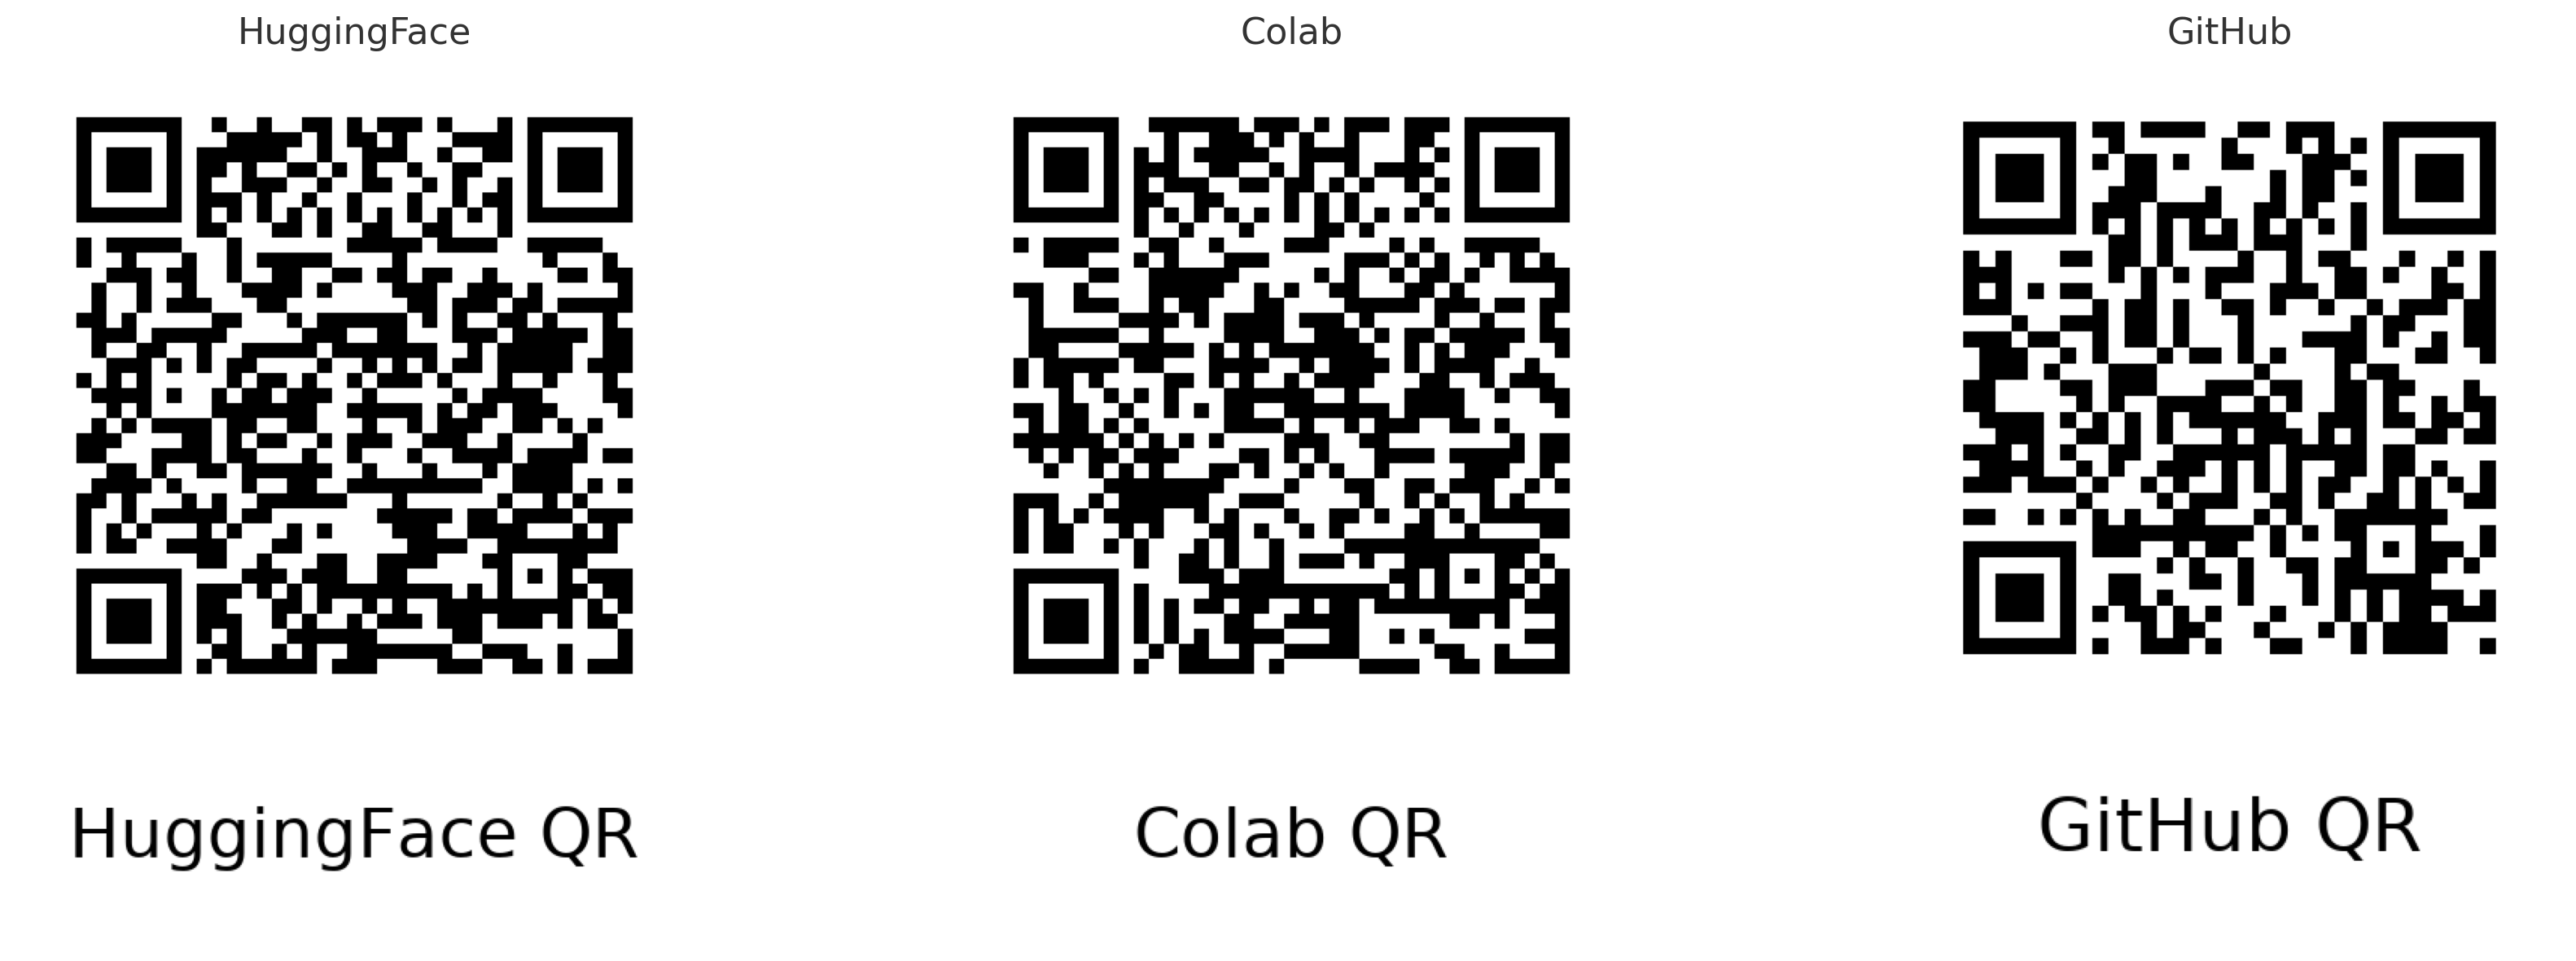